# Weights analysis

In [63]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Read TRPO weights
runs_trpo = []
for i in range(5):
    this_run = []
    f = open('../trpois/' + str(i+11) + '/cout.txt', 'r').readlines()
    # Filter lines without weights, if it does not include ], append the following line from the | symbol
    for j in range(len(f)):
        if 'Weights' in f[j]:
            if ']' in f[j]:
                total_line = f[j]
            else:
                total_line = f[j][:f[j].index('\n')] + f[j+1][f[j+1].index('|')+1:]
            # Now we can extract the array
            total_line = total_line[total_line.index('[')+1:total_line.index(']')]
            splits = [s for s in total_line.split(' ') if len(s) > 0]
            assert len(splits) == 5, "Incorrect weights."
            weights = list(map(float, splits))
            this_run.append(weights)
    runs_trpo.append(this_run)
runs_trpo = np.array(runs_trpo)

In [86]:
# Read POIS weights: delta 0.99
runs_pois99 = []
for i in range(5):
    this_run = []
    f = open('../trpois/' + str(i+21) + '/cout.txt', 'r').readlines()
    for j in range(len(f)):
        if '**********' in f[j]:
            array_line = f[j+5]
            assert '[' in array_line and ']' in array_line, "Parsing error."
            weights = list(map(lambda x: float(x.strip()[1:-1]), array_line[1:-2].split(',')))
            this_run.append(weights)
    runs_pois99.append(this_run)
runs_pois99 = np.array(runs_pois99)

# Read POIS weights: delta 0.9999
runs_pois9999 = []
for i in range(5):
    this_run = []
    f = open('../trpois/' + str(i+26) + '/cout.txt', 'r').readlines()
    for j in range(len(f)):
        if '**********' in f[j]:
            array_line = f[j+5]
            assert '[' in array_line and ']' in array_line, "Parsing error."
            weights = list(map(lambda x: float(x.strip()[1:-1]), array_line[1:-2].split(',')))
            this_run.append(weights)
    runs_pois9999.append(this_run)
runs_pois9999 = np.array(runs_pois9999)

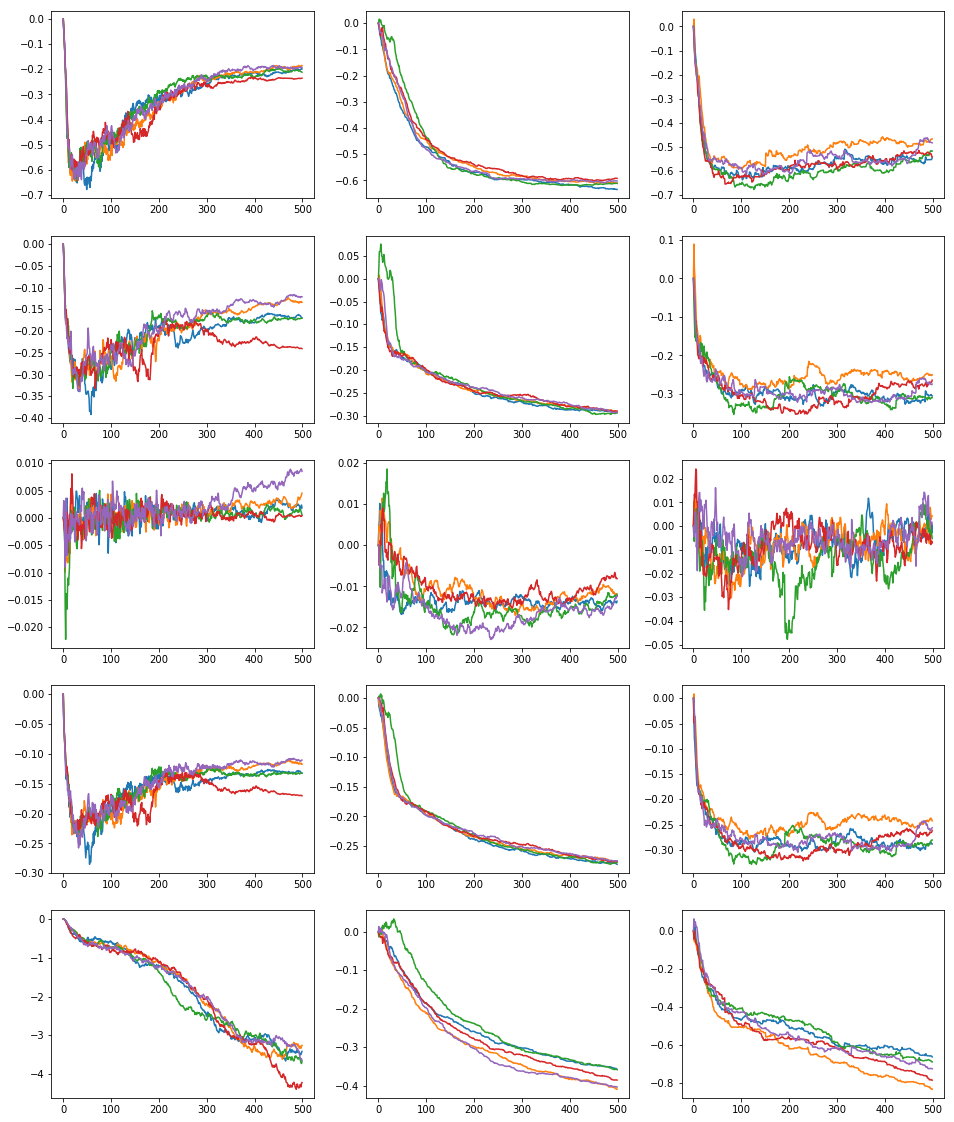

In [87]:
fig, ax = plt.subplots(5, 3, figsize=(16, 20))
for i in range(5):
    for r in range(5):
        ax[i,0].plot(runs_trpo[r,:,i])
        ax[i,1].plot(runs_pois99[r,:,i])
        ax[i,2].plot(runs_pois9999[r,:,i])
plt.show();